In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import sklearn.linear_model as lm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn import tree
# ignore the warning you might get from importing ensemble from sklearn
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import tree
pd.set_option('display.max_columns', None)


# Question

1. Can we predict which counties will be severely affected based on their mortality rates and SIR model?

# The Data
This data was updated to 5/11/2020

In [2]:
provinces = pd.read_csv("4.18states.csv")
provinces.sort_values('FIPS', ascending=False)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
13,Grand Princess,US,2020-04-18 22:32:47,NaN,NaN,103,0,0.0,103.0,99999.0,NaN,NaN,NaN,0.000000,84099999,USA,NaN,NaN
9,Diamond Princess,US,2020-04-18 22:32:47,NaN,NaN,49,0,0.0,49.0,88888.0,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN
52,Virgin Islands,US,2020-04-18 22:32:47,18.3358,-64.8963,53,3,46.0,50.0,78.0,49.408957,443.0,NaN,5.660377,850,VIR,412.984301,NaN
44,Puerto Rico,US,2020-04-18 22:32:47,18.2208,-66.5901,1118,60,NaN,1058.0,72.0,38.112666,9173.0,NaN,5.366726,630,PRI,312.707949,NaN
39,Northern Mariana Islands,US,2020-04-18 22:32:47,15.0979,145.6739,14,2,9.0,12.0,69.0,25.388075,56.0,NaN,14.285714,580,MNP,101.552299,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Xinjiang,China,NaN,41.1129,85.2401,76,3,73.0,0.0,NaN,0.305589,NaN,NaN,3.947368,15629,CHN,NaN,NaN
136,Yukon,Canada,NaN,64.2823,-135.0000,9,0,0.0,9.0,NaN,21.909538,NaN,NaN,0.000000,12412,CAN,NaN,NaN
137,Yunnan,China,NaN,24.9740,101.4870,184,2,177.0,5.0,NaN,0.380952,NaN,NaN,1.086957,15630,CHN,NaN,NaN
138,Zhejiang,China,NaN,29.1832,120.0934,1268,1,1246.0,21.0,NaN,2.210214,NaN,NaN,0.078864,15631,CHN,NaN,NaN


In [3]:
counties = pd.read_csv("abridged_couties.csv")
counties.head()

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,CensusRegionName,CensusDivisionName,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,CensusPopulation2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",3-YrDiabetes2015-17,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,PopFmle10-142010,PopMale15-192010,PopFmle15-192010,PopMale20-242010,PopFmle20-242010,PopMale25-292010,PopFmle25-292010,PopMale30-342010,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,3-YrMortalityAge<1Year2015-17,3-YrMortalityAge1-4Years2015-17,3-YrMortalityAge5-14Years2015-17,3-YrMortalityAge15-24Years2015-17,3-YrMortalityAge25-34Years2015-17,3-YrMortalityAge35-44Years2015-17,3-YrMortalityAge45-54Years2015-17,3-YrMortalityAge55-64Years2015-17,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,South,East South Central,2.0,55601.0,27007.0,28497.0,0.486578,8392.0,91.8,54571.0,37.0,11439.0,8046.0,16.0,9.9,204.5,56.1,18.081557,81.79,324.0,50.0,0.0,1.0,6.0,0.326656,1866.0,1713.0,2001.0,1990.0,2171.0,2119.0,2213.0,2077.0,1539.0,1541.0,1543.0,1614.0,1594.0,1736.0,3978.0,4265.0,4040.0,4165.0,1524.0,1559.0,1279.0,1498.0,1821.0,2192.0,841.0,1141.0,159.0,392.0,NaN,NaN,NaN,NaN,10.0,20.0,44.0,73.0,112.0,143.0,109.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,South,East South Central,3.0,218022.0,103225.0,109403.0,0.485472,42413.0,114.7,182265.0,41.1,54145.0,41590.0,33.0,8.5,183.2,41.9,17.489033,54.28,2101.0,536.0,0.0,3.0,51.0,0.253255,5614.0,5544.0,5832.0,5767.0,6076.0,5850.0,5930.0,5670.0,4793.0,4656.0,5183.0,5064.0,5317.0,5392.0,11620.0,11933.0,13047.0,13874.0,5943.0,6580.0,5728.0,6284.0,8558.0,9245.0,4379.0,5153.0,1176.0,2057.0,13.0,NaN,NaN,23.0,30.0,52.0,125.0,262.0,434.0,546.0,597.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,South,East South Central,6.0,24881.0,13335.0,11935.0,0.527701,4757.0,31.0,27457.0,39.0,6681.0,4706.0,NaN,15.7,220.4,49.0,21.999985,69.82,181.0,12.0,0.0,1.0,5.0,0.893106,847.0,855.0,826.0,816.0,820.0,779.0,919.0,812.0,1048.0,746.0,1212.0,798.0,1162.0,646.0,2115.0,1513.0,2164.0,1854.0,910.0,907.0,859.0,940.0,1067.0,1171.0,498.0,730.0,129.0,314.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0,44.0,65.0,72.0,68.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,South,East South Central,1.0,22400.0,12138.0,10530.0,0.535469,3632.0,36.8,22915.0,37.8,5128.0,3389.0,NaN,13.3,225.5,57.2,19.114200,84.49,145.0,16.0,0.0,1.0,0.0,0.278124,712.0,666.0,759.0,646.0,771.0,669.0,806.0,737.0,811.0,680.0,987.0,616.0,1013.0,633.0,1895.0,1487.0,1883.0,1503.0,734.0,667.0,684.0,650.0,803.0,920.0,370.0,534.0,73.0,206.0,NaN,NaN,NaN,NaN,NaN,NaN,24.0,37.0,62.0,56.0,45.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,1498

In [4]:
counties.columns.values

array(['countyFIPS', 'STATEFP', 'COUNTYFP', 'CountyName', 'StateName',
       'State', 'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE',
       'CensusRegionName', 'CensusDivisionName',
       'Rural-UrbanContinuumCode2013', 'PopulationEstimate2018',
       'PopTotalMale2017', 'PopTotalFemale2017', 'FracMale2017',
       'PopulationEstimate65+2017', 'PopulationDensityperSqMile2010',
       'CensusPopulation2010', 'MedianAge2010',
       '#EligibleforMedicare2018', 'MedicareEnrollment,AgedTot2017',
       '3-YrDiabetes2015-17', 'DiabetesPercentage',
       'HeartDiseaseMortality', 'StrokeMortality', 'Smokers_Percentage',
       'RespMortalityRate2014', '#FTEHospitalTotal2017',
       "TotalM.D.'s,TotNon-FedandFed2017",
       '#HospParticipatinginNetwork2017', '#Hospitals', '#ICU_beds',
       'dem_to_rep_ratio', 'PopMale<52010', 'PopFmle<52010',
       'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale

In [5]:
confirmed = pd.read_csv("time-series-counties-updated.csv")
confirmed.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,5,12,14,15,27,29,32,37,45,51,55,56,58,69,77,82,84,93,112,113,121,121,128,130,133,133,133,133,135,135,136,136,136,136,136,136,139,141,141,141,141,141,141,145,145,145,145,145,145,149,149,151,151,151,151
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,6,8,8,8,8,8,11,11,11,11,11,11,11,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,16,16,19
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,14,21,23,31,39,51,64,79,100,127,174,239,286,316,316,452,475,513,573,620,683,725,788,897,903,923,974,1043,1068,1118,1213,1252,1298,1252,1416,1276,1307,1371,1389,1400,1433,1539,1575,1757,1808,1843,1924,1968,2031,2156,2173,2198,2256
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,6,6,7,17,17,17,19,22,23,30,30,30,30,37,40,42,43,43,45,45,50,51,51,51,51,51,51,51,53,53,53,53,54,54,54,55,57,57,57,57,66,66,66,66,66,66,66,66,68,68,69,69


In [6]:
confirmed.columns.values

array(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', '1/22/20',
       '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20',
       '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20',
       '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20',
       '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20',
       '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20',
       '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20',
       '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20',
       '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20',
  

In [7]:
deaths = pd.read_csv("time-series-deaths-updated.csv")
deaths.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",55641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",164229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",55144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",2933408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,2,2,3,3,3,6,8,11,12,15,18,20,21,23,24,33,39,42,44,45,45,51,56,58,60,62,63,64,63,69,77,83,84,84,86,86,92,94,95,97,97,99,99,102,107,108,111,113
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",107268,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5


# Part 1: Data Cleaning

In [27]:
# only focusing on counties in the US
usa = provinces[provinces['Country_Region'] == 'US']
# remove Province_State named 'Recovered'
usa = usa.drop([116])
usa.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-18 22:32:47,32.3182,-86.9023,4712,153,NaN,4559.0,1.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895
1,Alaska,US,2020-04-18 22:32:47,61.3707,-152.4044,314,9,147.0,305.0,2.0,52.530410,9655.0,39.0,2.866242,84000002,USA,1615.226458,12.420382
2,American Samoa,US,NaN,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,3.0,NaN,NaN,16,ASM,5.391708,NaN
3,Arizona,US,2020-04-18 22:32:47,33.7298,-111.4312,4724,180,539.0,4544.0,4.0,64.901548,51045.0,566.0,3.810330,84000004,USA,701.291175,11.981372
4,Arkansas,US,2020-04-18 22:32:47,34.9697,-92.3731,1744,38,703.0,1706.0,5.0,67.361213,24141.0,291.0,2.178899,84000005,USA,932.435235,16.685780


In [28]:
# remove non-numerical countyFIPS (i.e. City1 and City2)
counties = counties.drop([3242, 3243])

In [29]:
def make_timestamp(data):
    """
    Input:
        data (series): series of time ordinal values to be changed
    Output:
        list of Timestamps
    """
    return [pd.Timestamp.fromordinal(ordinal=int(x)) if x >= 1 else x for x in data]

In [30]:
# change 'stay at home' values to Timestamps
counties['stay at home'] = counties['stay at home'].fillna(0)
counties['stay at home'] = make_timestamp(counties['stay at home'])

# change to int for merging
counties['countyFIPS'] = counties['countyFIPS'].astype(int)

In [31]:
# convert FIPS to int for table merging later
confirmed['FIPS'] = pd.to_numeric(confirmed['FIPS']).fillna(0).astype(int)
deaths['FIPS'] = pd.to_numeric(deaths['FIPS']).fillna(0).astype(int)

In [32]:
# clean for only valid counties by removing Null values in Admin2
valid_confirmed = confirmed[confirmed['Admin2'].isnull() == False]
valid_confirmed = valid_confirmed.rename(columns={'FIPS':'countyFIPS'}) # rename for merging with counties

valid_deaths = deaths[deaths['Admin2'].isnull() == False]
valid_deaths = valid_deaths.rename(columns={'FIPS':'countyFIPS'}) # rename for merging with counties

In [33]:
# merge counties with confirmed to get all variables per county
confirmed_data = counties.merge(valid_confirmed, on='countyFIPS').sort_values('4/18/20', ascending=False)
confirmed_data.head()

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,CensusRegionName,CensusDivisionName,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,CensusPopulation2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",3-YrDiabetes2015-17,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,PopFmle10-142010,PopMale15-192010,PopFmle15-192010,PopMale20-242010,PopFmle20-242010,PopMale25-292010,PopFmle25-292010,PopMale30-342010,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,3-YrMortalityAge<1Year2015-17,3-YrMortalityAge1-4Years2015-17,3-YrMortalityAge5-14Years2015-17,3-YrMortalityAge15-24Years2015-17,3-YrMortalityAge25-34Years2015-17,3-YrMortalityAge35-44Years2015-17,3-YrMortalityAge45-54Years2015-17,3-YrMortalityAge55-64Years2015-17,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop,UID,iso2,iso3,code3,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20
1849,36061,36.0,61.0,New York,NY,New York,40.770216,-73.974271,40.777958,-73.966303,Northeast,Middle Atlantic,1.0,1628701.0,789070.0,875657.0,0.473994,266384.0,69468.4,1585873.0,36.4,295301.0,245044.0,272.0,6.5,143.5,18.9,12.418234,23.47,100758.0,23727.0,12.0,12.0,761.0,8.917633,39065.0,37514.0,31058.0,30265.0,29474.0,28755.0,36917.0,40545.0,61738.0,79820.0,85210.0,101523.0,75662.0,78839.0,117835.0,116309.0,100541.0,102428.0,42980.0,49668.0,37558.0,48016.0,49432.0,65937.0,27735.0,40662.0,9236.0,21151.0,59.0,NaN,15.0,63.0,145.0,220.0,574.0,1113.0,1754.0,2339.0,3689.0,574.069333,2020-03-22 00:00:00,737500.0,737497.0,737502.0,737500.0,737500.0,737500.0,737495.0,0.5510,NaN,NaN,NaN,84036061,US,USA,840,New York,New York,US,40.767273,-73.971526,"New York City, New York, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,4,11,11,12,19,25,55,95,154,269,269,463,814,1871,3954,5151,7530,9654,12305,14904,17856,21873,25573,29776,33768,37453,43119,47439,51809,57159,63306,67551,72181,76876,81803,87028,92384,98308,103208,106763,110465,118302,123146,127352,131334,134267,136591,139348,142227,145855,150473,155113,158258,160489,162338,164841,167478,169690,172354,174331,175651,176874,178351,180216,181783,183289,184417,185357
1848,36059,36.0,59.0,Nassau,NY,New York,40.745862,-73.583883,40.716587,-73.602242,Northeast,Middle Atlantic,1.0,1358343.0,666014.0,70350

In [34]:
# merge counties with deaths to get all variables per county
deaths_data = counties.merge(valid_deaths, on='countyFIPS').sort_values('4/18/20', ascending=False)
deaths_data.head()

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,CensusRegionName,CensusDivisionName,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,CensusPopulation2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",3-YrDiabetes2015-17,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,PopFmle10-142010,PopMale15-192010,PopFmle15-192010,PopMale20-242010,PopFmle20-242010,PopMale25-292010,PopFmle25-292010,PopMale30-342010,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,3-YrMortalityAge<1Year2015-17,3-YrMortalityAge1-4Years2015-17,3-YrMortalityAge5-14Years2015-17,3-YrMortalityAge15-24Years2015-17,3-YrMortalityAge25-34Years2015-17,3-YrMortalityAge35-44Years2015-17,3-YrMortalityAge45-54Years2015-17,3-YrMortalityAge55-64Years2015-17,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop,UID,iso2,iso3,code3,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20
1849,36061,36.0,61.0,New York,NY,New York,40.770216,-73.974271,40.777958,-73.966303,Northeast,Middle Atlantic,1.0,1628701.0,789070.0,875657.0,0.473994,266384.0,69468.4,1585873.0,36.4,295301.0,245044.0,272.0,6.5,143.5,18.9,12.418234,23.47,100758.0,23727.0,12.0,12.0,761.0,8.917633,39065.0,37514.0,31058.0,30265.0,29474.0,28755.0,36917.0,40545.0,61738.0,79820.0,85210.0,101523.0,75662.0,78839.0,117835.0,116309.0,100541.0,102428.0,42980.0,49668.0,37558.0,48016.0,49432.0,65937.0,27735.0,40662.0,9236.0,21151.0,59.0,NaN,15.0,63.0,145.0,220.0,574.0,1113.0,1754.0,2339.0,3689.0,574.069333,2020-03-22 00:00:00,737500.0,737497.0,737502.0,737500.0,737500.0,737500.0,737495.0,0.5510,NaN,NaN,NaN,84036061,US,USA,840,New York,New York,US,40.767273,-73.971526,"New York City, New York, US",5803210,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,5,11,21,32,57,84,134,180,232,328,433,573,798,1050,1377,1729,2128,2589,3115,3754,4399,5077,5804,6596,7406,8137,8861,9558,10238,10955,11681,12324,12851,13374,13826,14291,14735,15169,15529,15864,16158,16190,17126,17280,17515,17682,18076,18069,18399,18491,18925,19057,19067,19174,19626,19561,19818,19789,20056
1848,36059,36.0,59.0,Nassau,NY,New York,40.745862,-73.583883,40.716587,-73.602242,Northeast,Middle Atlantic,1.0,1358343.0,666014.0,703500.0,0.486314,238107.0,4704.8,1339532.0,41.1,276379.0,23

In [8]:
#start cleaning data for our model
confirmed_new = pd.read_csv("time-series-counties-updated.csv")
confirmed_new = confirmed_new.drop([0, 1, 2, 3, 4])
confirmed_new = confirmed_new.rename(columns = {'UID':'countyFIPS'})

deaths_new = pd.read_csv("time-series-deaths-updated.csv")
deaths_new = deaths_new.drop([0, 1, 2, 3, 4])
deaths_new = deaths_new.rename(columns = {'UID':'countyFIPS'})
counties_new = pd.read_csv("abridged_couties.csv")


In [9]:
#standardize the county IDs
confirmed_new['countyFIPS'] = confirmed_new['countyFIPS'].apply(str).str[3:]
deaths_new['countyFIPS'] = deaths_new['countyFIPS'].apply(str).str[3:]



In [176]:
#merge data frames to get counties with matching countyFIPS
confirmed_with_info = counties_new.merge(confirmed_new, on='countyFIPS')
deaths_merged = confirmed_with_info.merge(deaths_new, on = 'countyFIPS')

#add info about death rates to confirmed_with_info
confirmed_with_info['deaths_total'] = deaths_merged['5/11/20_y']
confirmed_with_info = confirmed_with_info[confirmed_with_info['5/11/20'] > 50]
deaths_merged = deaths_merged[deaths_merged['5/11/20_x'] > 50]
Y = deaths_merged['5/11/20_y'] / confirmed_with_info['5/11/20']
Y = Y.fillna(0)
confirmed_with_info['death_rate'] = Y
confirmed_with_info['death_rate_pop'] = Y / confirmed_with_info['PopulationEstimate2018']
confirmed_with_info['death_rate_rounded'] = np.around(Y, 2)
confirmed_with_info['4/11/20_d'] = deaths_merged['4/11/20_y']
confirmed_with_info['4/10/20_d'] = deaths_merged['4/10/20_y']
confirmed_with_info['4/9/20_d'] = deaths_merged['4/9/20_y']
confirmed_with_info['5/4/20_d'] = deaths_merged['5/4/20_y']
confirmed_with_info['5/3/20_d'] = deaths_merged['5/3/20_y']
confirmed_with_info['5/2/20_d'] = deaths_merged['5/2/20_y']
confirmed_with_info



,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,CensusRegionName,CensusDivisionName,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,CensusPopulation2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",3-YrDiabetes2015-17,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,PopFmle10-142010,PopMale15-192010,PopFmle15-192010,PopMale20-242010,PopFmle20-242010,PopMale25-292010,PopFmle25-292010,PopMale30-342010,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,3-YrMortalityAge<1Year2015-17,3-YrMortalityAge1-4Years2015-17,3-YrMortalityAge5-14Years2015-17,3-YrMortalityAge15-24Years2015-17,3-YrMortalityAge25-34Years2015-17,3-YrMortalityAge35-44Years2015-17,3-YrMortalityAge45-54Years2015-17,3-YrMortalityAge55-64Years2015-17,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,deaths_total,death_rate,death_rate_pop,death_rate_rounded,4/11/20_d,4/10/20_d,4/9/20_d,5/4/20_d,5/3/20_d,5/2/20_d
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,South,East South Central,2.0,55601.0,27007.0,28497.0,0.486578,8392.0,91.8,54571.0,37.0,11439.0,8046.0,16.0,9.9,204.5,56.1,18.081557,81.79,324.0,50.0,0.0,1.0,6.0,0.326656,1866.0,1713.0,2001.0,1990.0,2171.0,2119.0,2213.0,2077.0,1539.0,1541.0,1543.0,1614.0,1594.0,1736.0,3978.0,4265.0,4040.0,4165.0,1524.0,1559.0,1279.0,1498.0,1821.0,2192.0,841.0,1141.0,159.0,392.0,NaN,NaN,NaN,NaN,10.0,20.0,44.0,73.0,112.0,143.0,109.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,6,6,6,6,6,7,8,10,12,12,12,12,12,12,15,17,19,19,19,23,24,26,26,25,26,28,30,32,33,36,36,37,39,40,43,44,42,45,48,53,53,58,61,67,68,74,84,4,0.047619,8.564423e-07,0.05,1,1,1,3,3,3
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,South,East South Central,3.0,218022.0,103225.0,109403.0,0.485472,42413.0,114.7,182265.0,41.1,54145.0,41590.0,33.0,8.5,183.2,41.9,17.489033,54.28,2101.0,536.0,0.0,3.0,51.0,0.253255,5614.0,5544.0,5832.0,5767.0,6076.0,5850.0,5930.0,5670

## What does the data look like?

In [20]:
def plotline_confirmed(data):
    """
    line plot showing rate of change of confirmed cases per county and stay in place order dates
    stay in place order dates:
        https://en.wikipedia.org/wiki/File:COVID-19_outbreak_USA_stay-at-home_order_county_map.svg
    Input:
        data: dataframe w/ dates as rows and countyFIPS as columns
    """

    ax = data.plot(x='Date')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # x is the row number in axvline
    plt.axvline(x=60, color='0.6', linestyle='--') #3/22/20
    plt.axvline(x=67, color='0.4', linestyle='--') #3/29/20
    plt.axvline(x=74, color='0.2', linestyle='--') #4/5/20
    plt.axvline(x=81, color='k', linestyle='--') #4/12/20

    plt.ylabel("# Confirmed")
    plt.title("Confirmed cases over time")
    plt.show()

In [21]:
# create a table of dates as rows and countyFIPS as columns for top 20 counties
dates = list(np.append('countyFIPS', confirmed_data.columns.values[97:185]))
times = confirmed_data.get(dates).set_index('countyFIPS')
top_20_confirmed = times.T.iloc[:, :20].reset_index().rename(columns={'index':'Date'})
top_20_confirmed.head()

countyFIPS,Date,36061,36059,36103,36119,17031,26163,34003,6037,34017,...,36087,12086,42101,34039,25017,34031,25025,34023,9001,36071
0,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1/24/20,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1/25/20,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1/26/20,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


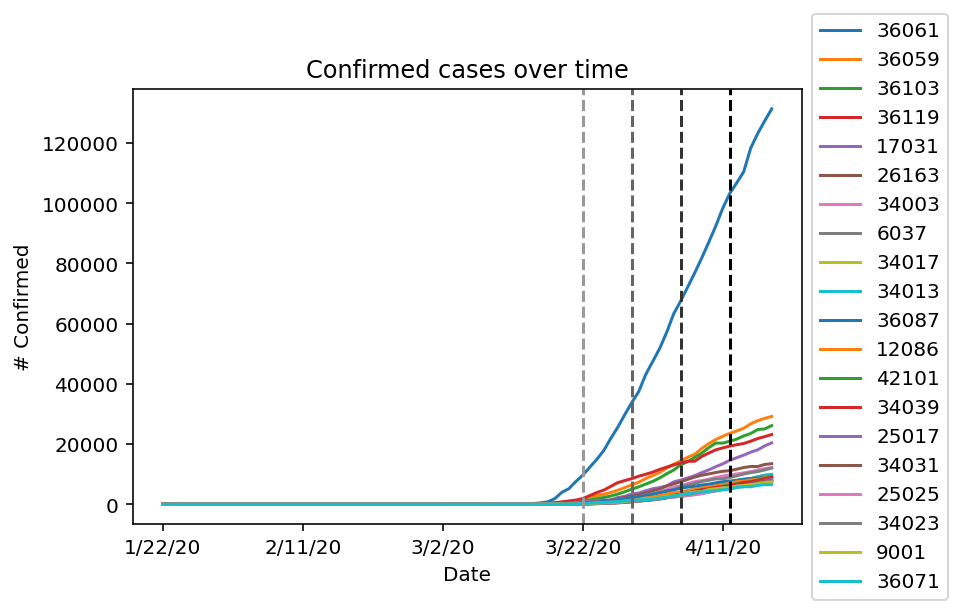

In [22]:
# top 20 counties confirmed
plotline_confirmed(top_20_confirmed)
# confirmed_data.iloc[:20, :6]

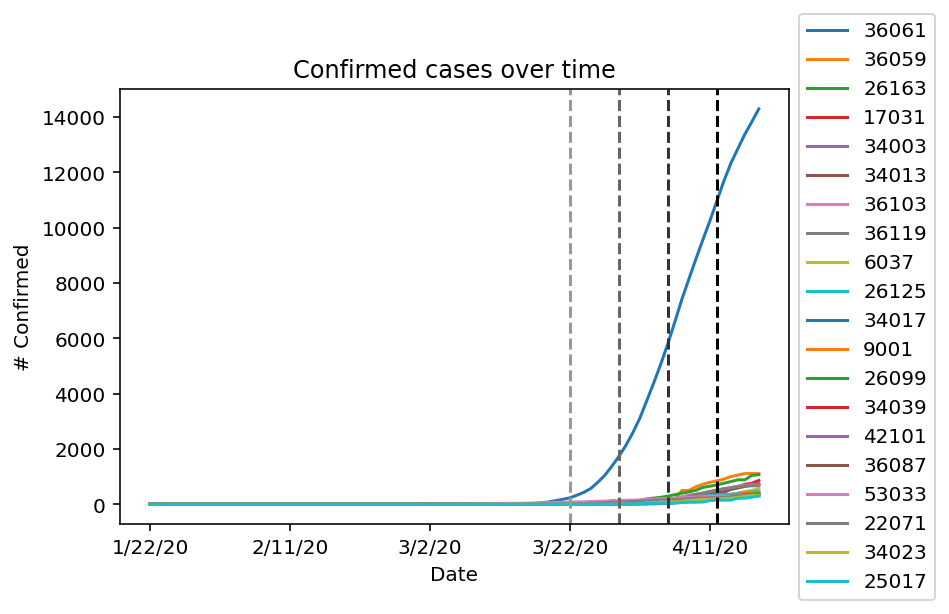

In [23]:
# top 20 counties deaths
times = deaths_data.get(dates).set_index('countyFIPS')
top_20_deaths = times.T.iloc[:, :20].reset_index().rename(columns={'index':'Date'})
plotline_confirmed(top_20_deaths)
# deaths_data.iloc[:20, :6]

We can see that New York, NY has the highest rate of change, which aligns with reality. New York, NY is the most infected county at the moment.

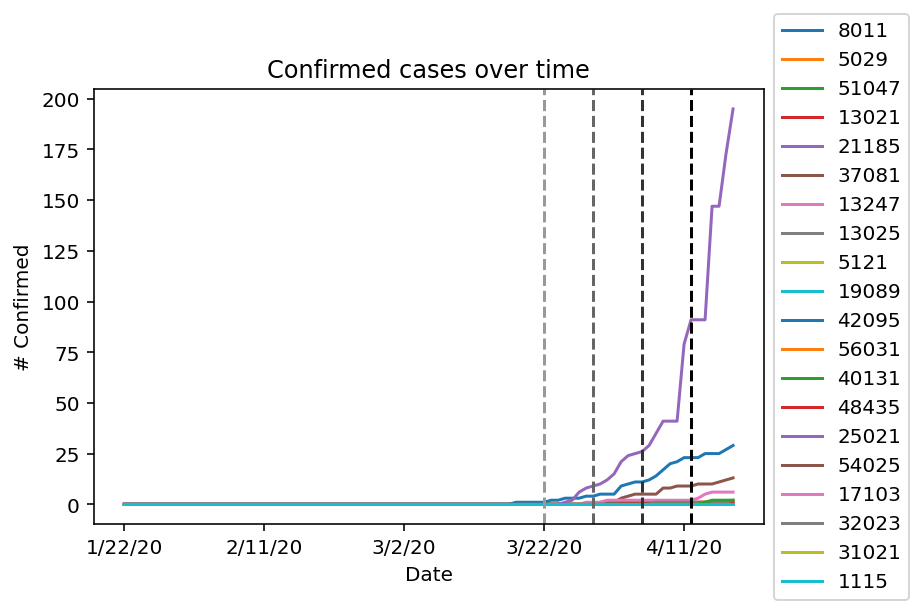

In [24]:
# What about any 20 counties?
shuffled = times.sample(frac=1)
any_20 = shuffled.T.iloc[:, -20:].reset_index().rename(columns={'index':'Date'})
plotline_confirmed(any_20)

counties_lst = list(any_20.columns.values[1:].astype(int))
# confirmed_data[confirmed_data['countyFIPS'].isin(counties_lst)].iloc[:, :6]

Here we examine the distribution of death rates across counties with more than 30 confirmed cases

mean:
0.04595458769718085
standard deviation:
0.040176936073109


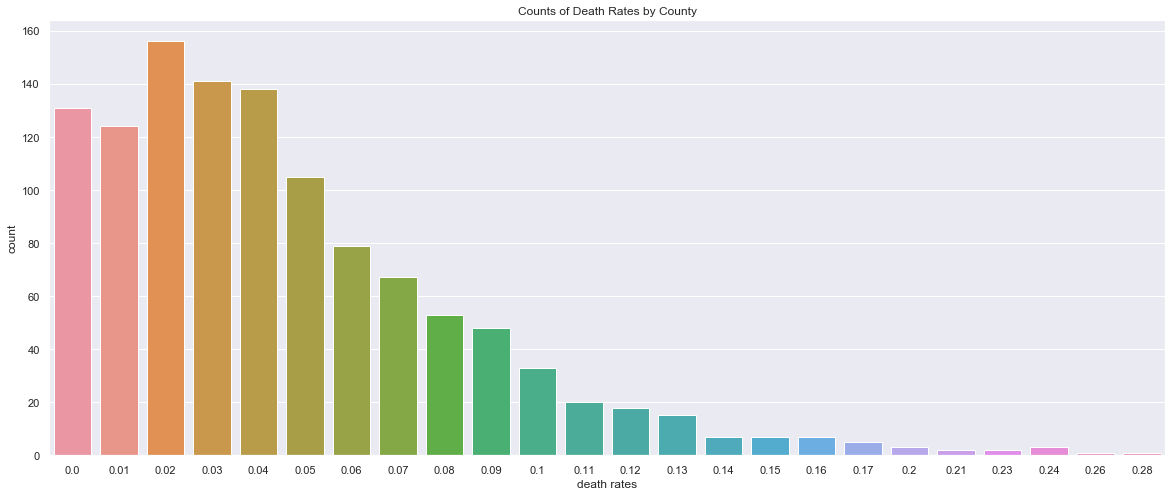

In [330]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(x="death_rate_rounded", data=confirmed_with_info)
plt.xlabel('death rates')
plt.ylabel('count')
plt.title('Counts of Death Rates by County')


print('mean:')
print(np.mean(Y))
print('standard deviation:')
print(np.std(Y))


Now that we know the distribution, we will assign each bin of numbers to a category describing how hard-hit a county is based off of its death rate. We assigned the normal section to +-1 standard deviation (.04)from the mean (.45) and the rest of the categories also according to standard deviation.

In [327]:
categories = {'good' : [0, .015], 'fair' : [.015, .08], 'bad' : [.08, .12], 'severe' : [.12, 1]}

cats = []
for rate in confirmed_with_info['death_rate']:
    if rate >= 0 and rate < .015:
        cats.append('good')
    elif rate >= .015 and rate < .08:
        cats.append('fair')
    elif rate >= .08 and rate < .12:
        cats.append('bad')
    else:
        cats.append('severe')
cats
#previous attempts
#     cat = categories[key]
#     confirmed_with_info[(confirmed_with_info['death_rate'] >=cat[0])][(confirmed_with_info['death_rate'] < cat[1])]['categories'] = key
# confirmed_with_info.loc[(confirmed_with_info['death_rate'] >=cat[0])].loc[(confirmed_with_info['death_rate'] < cat[1])].iloc['categories'] = 'hello'
# confirmed_with_info[(confirmed_with_info['death_rate'] >=cat[0])][(confirmed_with_info['death_rate'] < cat[1])]['categories']
confirmed_with_info['categories'] = cats
confirmed_with_info


,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,CensusRegionName,CensusDivisionName,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,CensusPopulation2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",3-YrDiabetes2015-17,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,PopFmle10-142010,PopMale15-192010,PopFmle15-192010,PopMale20-242010,PopFmle20-242010,PopMale25-292010,PopFmle25-292010,PopMale30-342010,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,3-YrMortalityAge<1Year2015-17,3-YrMortalityAge1-4Years2015-17,3-YrMortalityAge5-14Years2015-17,3-YrMortalityAge15-24Years2015-17,3-YrMortalityAge25-34Years2015-17,3-YrMortalityAge35-44Years2015-17,3-YrMortalityAge45-54Years2015-17,3-YrMortalityAge55-64Years2015-17,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,deaths_total,death_rate,death_rate_pop,death_rate_rounded,4/11/20_d,4/10/20_d,4/9/20_d,5/4/20_d,5/3/20_d,5/2/20_d,categories,stay at home day,>50 gatherings day,>500 gatherings day,entertainment/gym day,5/2/20_dr,5/3/20_dr,5/4/20_dr
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,South,East South Central,2.0,55601.0,27007.0,28497.0,0.486578,8392.0,91.8,54571.0,37.0,11439.0,8046.0,16.0,9.9,204.5,56.1,18.081557,81.79,324.0,50.0,0.0,1.0,6.0,0.326656,1866.0,1713.0,2001.0,1990.0,2171.0,2119.0,2213.0,2077.0,1539.0,1541.0,1543.0,1614.0,1594.0,1736.0,3978.0,4265.0,4040.0,4165.0,1524.0,1559.0,1279.0,1498.0,1821.0,2192.0,841.0,1141.0,159.0,392.0,NaN,NaN,NaN,NaN,10.0,20.0,44.0,73.0,112.0,143.0,109.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,6,6,6,6,6,7,8,10,12,12,12,12,12,12,15,17,19,19,19,23,24,26,26,25,26,28,30,32,33,36,36,37,39,40,43,44,42,45,48,53,53,58,61,67,68,74,84,4,0.047619,8.564423e-07,0.05,1,1,1,3,3,3,normal,95.0,80.0,73.0,73.0,1.0,1.0,1.0
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,South,East South Central,3.0,218022.0,103225.0,109403.0,0.485472,42413.0,11

# Part 2: Building the Model

### Choosing Features

Text(0, 0.5, '# confirmed')

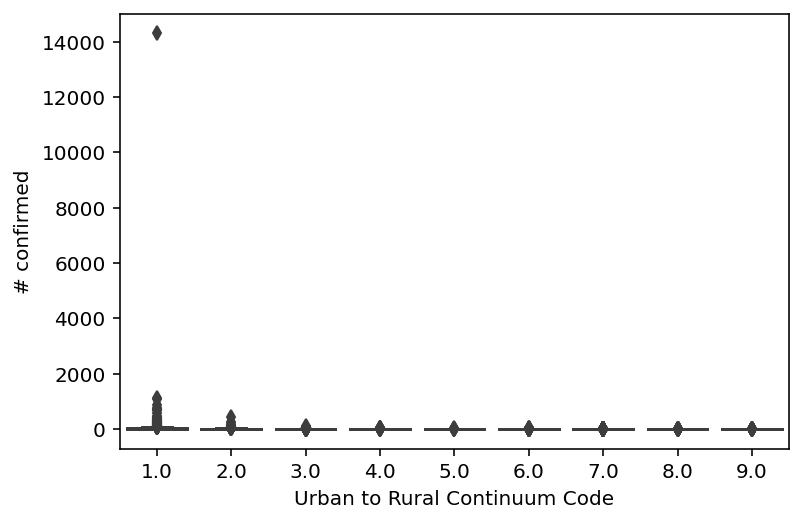

In [25]:
# plot to show number of deaths per urban/rural area
sns.boxplot(
    x='Rural-UrbanContinuumCode2013',
    y='4/18/20',
    data=deaths_data
);
plt.xlabel("Urban to Rural Continuum Code")
plt.ylabel("# confirmed")

Can't see the graph well because of the outlier, which corresponds to New York, NY. The below plot removes the top  five counties with the most confirmed cases in order to view the rest of the plot better.

Text(0, 0.5, 'Mortality Rate')

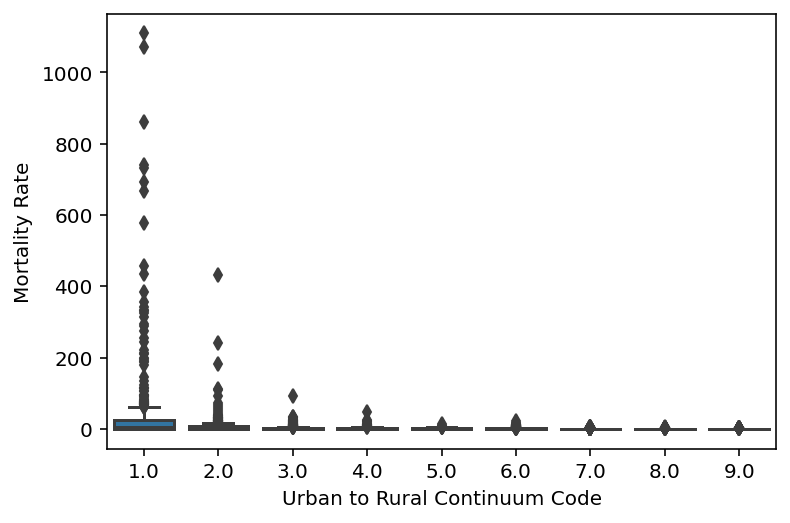

In [69]:
sns.boxplot(
    x='Rural-UrbanContinuumCode2013',
    y='4/18/20',
    data=deaths_data[1:] # all but the first row (New York, NY)
);
plt.xlabel("Urban to Rural Continuum Code")
plt.ylabel("Mortality Rate")

Now we can better see the correlation of Urban to Rural Continuum Code to confirmed cases

#### Stay at home times

In [0]:
valid_stay_times = deaths_data[deaths_data['stay at home'] != 0.0].sort_values('stay at home')

plt = sns.boxplot(
    x='stay at home',
    y='4/18/20',
    data=valid_stay_times
)
plt.set_xticklabels(plt.get_xticklabels(), rotation=45, ha='right');

From the plot, we can see that this feature wouldn't be helpful to use in the model.

In [0]:
# line plots for # deaths over time in relation to stay at home order dates

stayathome = valid_stay_times['stay at home']

before_322 = valid_stay_times[stayathome <= pd.Timestamp('2020-03-22 00:00:00')]
before_329 = valid_stay_times[(stayathome > pd.Timestamp('2020-03-22 00:00:00'))
                              & (stayathome <= pd.Timestamp('2020-03-29 00:00:00'))]
before_45 = valid_stay_times[(stayathome > pd.Timestamp('2020-03-29 00:00:00'))
                              & (stayathome <= pd.Timestamp('2020-04-05 00:00:00'))]
before_412 = valid_stay_times[(stayathome > pd.Timestamp('2020-04-05 00:00:00'))
                              & (stayathome <= pd.Timestamp('2020-04-12 00:00:00'))]

def stay_home_plot(data, date):
    plt = data[dates].set_index('countyFIPS')
    ax = plt.T.iloc[:, :20].reset_index().rename(columns={'index':'date'}).plot(x='date', legend=False)
    # ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_ylabel("Mortality Rate")
    ax.set_title("Stay at home before " + date)

stay_home_plot(before_322, '3/22')
stay_home_plot(before_329, '3/29')
stay_home_plot(before_45, '4/5')
stay_home_plot(before_412, '4/12')

From the plots, we can see that the stay at home order date has no large impact on the number of deaths over time so this feature is not used in the model.

## Mortality Rate Model

In [179]:
#split data into train and test sets
np.random.seed(41) # Do not change this line
X_train, X_test, Y_train, Y_test = train_test_split(confirmed_with_info, confirmed_with_info['categories'], test_size = 0.10)


In [180]:
#which columns have a lot of nan values?
na_cols = X_train.isna().sum()
na_cols[na_cols>0].keys()

Index(['State', 'lat', 'lon', '3-YrDiabetes2015-17', 'dem_to_rep_ratio',
       '3-YrMortalityAge<1Year2015-17', '3-YrMortalityAge1-4Years2015-17',
       '3-YrMortalityAge5-14Years2015-17', '3-YrMortalityAge15-24Years2015-17',
       '3-YrMortalityAge25-34Years2015-17',
       '3-YrMortalityAge35-44Years2015-17',
       '3-YrMortalityAge45-54Years2015-17',
       '3-YrMortalityAge55-64Years2015-17',
       '3-YrMortalityAge65-74Years2015-17',
       '3-YrMortalityAge75-84Years2015-17', '3-YrMortalityAge85+Years2015-17',
       'mortality2015-17Estimated', 'stay at home', '>50 gatherings',
       '>500 gatherings', 'entertainment/gym', 'HPSAShortage', 'HPSAServedPop',
       'HPSAUnderservedPop'],
      dtype='object')

In [181]:
def make_timestamp_day(data):

    return [pd.Timestamp.fromordinal(ordinal=int(x)).dayofyear if x >= 1 else x for x in data]

In [293]:
#clean train and test sets
def clean_data(df):
    df['State'] = df['State'].fillna('')
    fills = np.round(np.mean(df['#EligibleforMedicare2018'].fillna(0) / df['PopulationEstimate2018']) * df['PopulationEstimate2018'])
    df['#EligibleforMedicare2018'] = df['#EligibleforMedicare2018'].fillna(fills)
    medEnroll = np.round(np.mean(df['MedicareEnrollment,AgedTot2017'].fillna(0) / df['PopulationEstimate2018']) * df['PopulationEstimate2018'])
    df['MedicareEnrollment,AgedTot2017'] = df['MedicareEnrollment,AgedTot2017'].fillna(medEnroll)
    hdm = np.round(np.mean(df['HeartDiseaseMortality'].fillna(0) / df['PopulationEstimate2018']) * df['PopulationEstimate2018'])
    df['HeartDiseaseMortality'] = df['HeartDiseaseMortality'].fillna(hdm)
    strMo = np.round(np.mean(df['StrokeMortality'].fillna(0) / df['PopulationEstimate2018']) * df['PopulationEstimate2018'])
    df['StrokeMortality'] = df['StrokeMortality'].fillna(strMo)
    df['dem_to_rep_ratio'] = df['dem_to_rep_ratio'].fillna(np.mean(df['dem_to_rep_ratio']))
    df['stay at home day'] = make_timestamp_day(df['stay at home'])
    df['stay at home day'] = df['stay at home day'].fillna(366)
    df['>50 gatherings day'] = make_timestamp_day(df['>50 gatherings'])
    df['>50 gatherings day'] = df['>50 gatherings day'].fillna(366)
    df['>500 gatherings day'] = make_timestamp_day(df['>500 gatherings'])
    df['>500 gatherings day'] = df['>500 gatherings day'].fillna(366)
    df['entertainment/gym day'] = make_timestamp_day(df['>500 gatherings'])
    df['entertainment/gym day'] = df['entertainment/gym day'].fillna(366)
    df['lat'] = df['lat'].fillna(0)
    df['lon'] = df['lon'].fillna(0)
    mort = ['3-YrMortalityAge55-64Years2015-17','3-YrMortalityAge65-74Years2015-17','3-YrMortalityAge75-84Years2015-17', '3-YrMortalityAge85+Years2015-17']
    for i in mort:
        df[i] = df[i].fillna(0)
    df['5/2/20_dr'] = df['5/2/20_d'] / df['5/2/20_d']
    df['5/3/20_dr'] = df['5/3/20_d'] / df['5/3/20_d']
    df['5/4/20_dr'] = df['5/4/20_d'] / df['5/4/20_d']
    df['5/2/20_dr'] = df['5/2/20_dr'].fillna(0)
    df['5/3/20_dr'] = df['5/3/20_dr'].fillna(0)
    df['5/4/20_dr'] = df['5/4/20_dr'].fillna(0)
    return df
X_train = clean_data(X_train)
X_test = clean_data(X_test)
X_train

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,CensusRegionName,CensusDivisionName,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,CensusPopulation2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",3-YrDiabetes2015-17,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,PopFmle10-142010,PopMale15-192010,PopFmle15-192010,PopMale20-242010,PopFmle20-242010,PopMale25-292010,PopFmle25-292010,PopMale30-342010,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,3-YrMortalityAge<1Year2015-17,3-YrMortalityAge1-4Years2015-17,3-YrMortalityAge5-14Years2015-17,3-YrMortalityAge15-24Years2015-17,3-YrMortalityAge25-34Years2015-17,3-YrMortalityAge35-44Years2015-17,3-YrMortalityAge45-54Years2015-17,3-YrMortalityAge55-64Years2015-17,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,deaths_total,death_rate,death_rate_pop,death_rate_rounded,4/11/20_d,4/10/20_d,4/9/20_d,5/4/20_d,5/3/20_d,5/2/20_d,categories,stay at home day,>50 gatherings day,>500 gatherings day,entertainment/gym day,5/2/20_dr,5/3/20_dr,5/4/20_dr
1874,36111,36.0,111.0,Ulster,NY,New York,41.890001,-74.262550,41.841064,-74.100745,Northeast,Middle Atlantic,3.0,178599.0,88889.0,90528.0,0.495432,34540.0,162.3,182493.0,42.0,42097.0,32912.0,44.0,6.8,182.4,28.4,15.721730,52.25,1437.0,408.0,0.0,3.0,25.0,1.238046,4534.0,4462.0,4965.0,4784.0,5483.0,5195.0,6547.0,6596.0,6404.0,6074.0,5319.0,4725.0,5109.0,4799.0,12404.0,11743.0,15569.0,15120.0,6693.0,6914.0,5890.0,6120.0,6891.0,7573.0,3765.0,4989.0,1236.0,2590.0,NaN,NaN,NaN,17.0,34.0,43.0,91.0,211.0,331.0,416.0,601.0,NaN,737506.0,737500.0,737497.0,737502.0,737500.0,737500.0,737500.0,737495.0,0.4704,NaN,NaN,NaN,US,USA,840,36111.0,Ulster,New York,US,41.890279,-74.262521,"Ulster, New York, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,5,5,5,7,8,9,9,9,18,18,18,35,65,78,98,133,146,190,207,222,240,263,290,358,382,398,462,462,530,589,655,716,716,745,845,880,880,960,997,1018,1018,942,976,1166,1190,1219,1230,1252,1279,1298,1327,1341,1354,1357,1383,1416,1429,1440,1450,1454,58,0.039890,2.233493e-07,0.04,8,8,8,44,37,37,normal,82.0,76.0,73.0,73.0,1.0,1.0,1.0
856,19153,19.0,153.0,Polk,IA,Iowa,41.686179,-93

In [331]:
#columns to use for the model

cols = ['5/4/20_d', '5/3/20_d', '5/2/20_d', '5/4/20', '5/3/20', '5/2/20']
cols += ['>500 gatherings day','DiabetesPercentage','StrokeMortality', 'HeartDiseaseMortality',  '#ICU_beds', 'Smokers_Percentage', 'PopulationEstimate2018']



In [332]:
def rmse_score(model, X, y):
    return np.sqrt(np.mean((y - model.predict(X)) ** 2))

In [333]:
#previous attempt:
# model = lm.LinearRegression(normalize=True)
# model.fit(X_train[cols], Y_train)
# cross_val = np.mean(cross_val_score(model, X_train[cols], Y_train, scoring=rmse_score, cv = 5))
# pred = model.predict(X_test[cols])
# diff = sum(np.abs(pred - Y_test)) / len(pred)
# rmse_test = rmse_score(model, X_test[cols], Y_test)
# cross_val, rmse_test

In [334]:
model = ensemble.RandomForestClassifier(random_state=42, n_estimators=20)
model.fit(X_train[cols], Y_train)
train_accuracy = model.score(X_train[cols], Y_train)
test_accuracy = model.score(X_test[cols], Y_test)
train_accuracy, test_accuracy

(0.998093422306959, 0.6068376068376068)

After running different types of models and trying different features, we decided to use a Random Forest classifier to classify our counties. It ended up predicting the correct death rate category about 84% of the time. From this we wanted to see if we could predict the status of a county a week in advanced, as in the times of a pandemic, 1 week can make an extremely large difference in how many total cases, and therefore, total deaths there are.

Further, we saw that features such as the total population, the percentage of people who have diabetes and the amount of deaths a week prior helped bring our accuracy up. 

Additionally, we understand that 84% may seem a bit low for accuracy. We believe this is because there are many other factors involved in the spread of a pandemic that are not seen in the data given to us or that we could derive from the data we had. Things such as how full hospitals are at a given time, the initial viral load a person gets when contracting the disease, how easy it is to physically get to a hospital and other pre existing health conditions were not found in the data given that could potentially have a large impact on the death rate of a county.



Text(0.5, 0, 'Deaths on 5/4/2020')

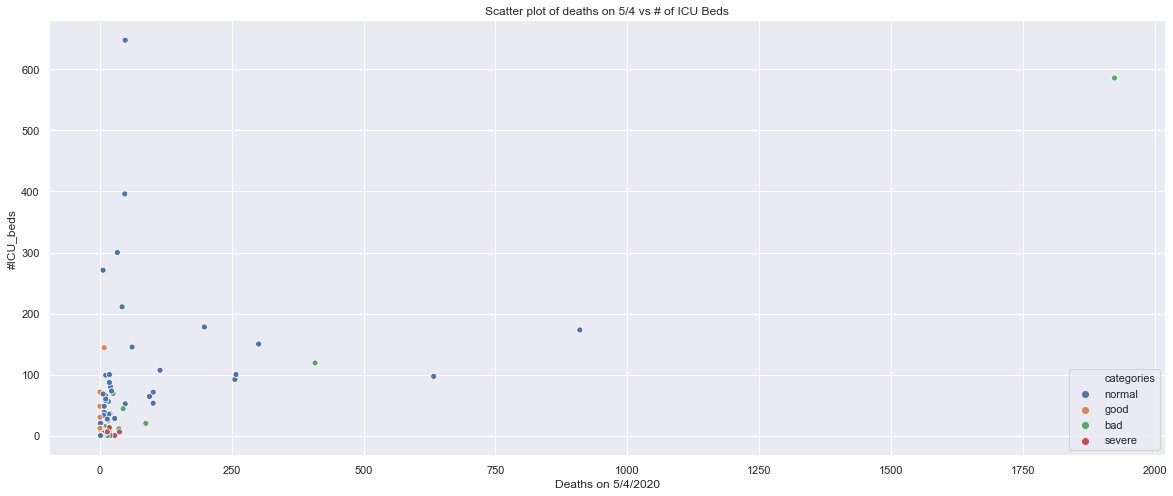

In [339]:
sns.scatterplot(x=X_test['5/4/20_d'], y=X_test['#ICU_beds'], hue = Y_test)
plt.title('Scatter plot of deaths on 5/4 vs # of ICU Beds')
plt.xlabel('Deaths on 5/4/2020')

## **SIR Model**

**Purpose**: to predict what could happen to counties at a certain time

$S$ = susceptible, $I$ = infected, $R$ = recovered, $DS$ = dead <br>
$N$ = population size<br>

$R0 = 3.8-8.9$ https://en.wikipedia.org/wiki/Basic_reproduction_number <br>
$R0 = \beta * D$ <br>

$\beta$ = expected num of people an infected person infects per day <br>
$D$ = length of period when a person is ill and can infect others <br>
https://www.cdc.gov/coronavirus/2019-ncov/hcp/clinical-guidance-management-patients.html

$\gamma$ = $1/D$ (rate of recovery) <br>
$\alpha$ = mortality rate <br>
$\rho$ = rate at which people die (1 / days from infected until death)

$S(t+1) = S(t) - \beta * I(t) * S(t)/N$ <br>
$I(t+1) = I(t) + \beta * I(t) * S(t)/N - (\gamma * I(t)) - (\alpha * \rho * I(t))$ <br>
$R(t+1) = R(t) + \gamma * I(t) * (1 - \alpha)$ <br>
$DS(t+1) = D(t) + \alpha * \rho * I(t)$

In [0]:
# split data so test is two weeks later than train but in time order; not random
train = list(confirmed_data.columns.values[97:185])
test = list(confirmed_data.columns.values[185:199])

##### **Attempt 1**

In [30]:
# try to pred 4/18/20 infected data

# N = confirmed_data['PopulationEstimate2018'].iloc[4]

# I = confirmed_data[dates[1:]].iloc[4].tolist()
# S = [N - i for i in I]
# R = [0] * len(I) # no recoveries at start

# for t in range(len(dates)):
#     S += [S[t] - beta * I[t] * S[t] / N]
#     I += [I[t] + beta * I[t] * S[t] / N - gamma * I[t]]
#     R += [R[t] + gamma * I[t]]

Using lists could only work if we were looking at one county, so I made separate dataframes instead that would be able to accommodate lists of values per county. We are looking at the same kind of data for multiple counties.

##### **Atempt 2**

Beyond the SIR Model: <br>
Added deaths to the calculations to see how it would affect the model <br>
https://towardsdatascience.com/infectious-disease-modelling-beyond-the-basic-sir-model-216369c584c4

In [310]:
from datetime import datetime, timedelta

def sir_model(days, train, confirmed_data, deaths_data, mortality, recovered):
    """
    - predicts SIR,DS for counties at a future time t
    - based on the SIR model in addition of the death feature

    Inputs:
        days (int) = number of days to predict
        train (list) = dates from training data set
        confirmed_data (df) = confirmed time series data for counties
        deaths_data (df) = deaths time series data for counties
        mortality (series) = mortality rates for each county
        recovered (df) = recovered values for each US state
    Outputs:
        S (df) = susceptible time series data for counties
        I (df) = infected time series data for counties
        R (df) = recovered time series data for counties
        DS (df) = deaths time series data for counties
    """

    # variables for calculations
    R0 = 3.8 # 3.8-8.9
    D = 11.5 + 28 # incubation period for 97.5% of persons with covid + time for recovery
    beta = R0 / D
    gamma = 1 / D
    rho = 1 / 10 # 1 / number of days from infection to death
    alpha = mortality / 100

    # population size
    N = confirmed_data['PopulationEstimate2018']

    #identifying columns for each df
    cols = confirmed_data[['countyFIPS', 'STATEFP', 'CountyName', 'StateName','State']]
    t0 = train[-1]

    #make the df's
    I = confirmed_data[train] #infected df
    DS = deaths_data[train] #deaths df

    R = I.copy()
    for t in train:
        R[t].values[:] = 0
    R = cols.join(R, how='right')
    R = R.merge(recovered, on='STATEFP', how='left').drop(t0, axis=1).fillna(0)
    R = R.rename(columns={'Recovered':t0})

    S = pd.DataFrame()
    for t in train:
        S[t] = N.tolist() - I[t] - R[t] - DS[t]

    I = cols.join(I, how='right')
    DS = cols.join(DS, how='right')
    S = cols.join(S, how='right')

    #calculate predictions
    t = train[-1]
    for i in np.arange(days):
        t1 = (datetime.strptime(t, '%m/%d/%y') + timedelta(days=1)).strftime('%-m/%-d/%y')
        S[t1] = round(S[t] - beta * I[t] * S[t] / N, 0)
        I[t1] = round(I[t] + (beta * I[t] * S[t] / N) - (gamma * I[t] * (1 - alpha)) - (alpha * rho * I[t]), 0)
        DS[t1] = round(DS[t] + alpha * rho * I[t], 0)
        R[t1] = round(R[t] + gamma * I[t] * (1 - alpha), 0)
        t = t1

    return S, I, R, DS

# each county has a different mortality rate
df = usa[['Mortality_Rate','FIPS']].rename(columns={'FIPS':'STATEFP'})
df = deaths_data.merge(df, on='STATEFP', how='left')
mortality = df['Mortality_Rate']

recovered = usa[['Recovered','FIPS']].rename(columns={'FIPS':'STATEFP'})

S,I,R,DS = sir_model(len(test), train, confirmed_data, deaths_data, mortality, recovered)


In [267]:
# calculate accuracy and error across all counties
# can't calculate error for S and R since there are no actual values to compare with

def sir_rmse(actual, pred):
    return np.sqrt(np.mean((actual - pred)**2))

rmseI = np.array([])
rmseDS = np.array([])

for t in test:
    rmseI = np.append(rmseI, sir_rmse(confirmed_data[t], I[t]))
    rmseDS = np.append(rmseDS, sir_rmse(deaths_data[t], DS[t]))

print('I rmse:', rmseI)
print('DS rmse:', rmseDS)

I rmse: [  51.25424947  101.03188782  166.12005098  233.71804969  309.61161565
  400.67266609  502.57397846  601.66839217  709.64586306  823.07983743
  946.81893947 1082.39396165 1221.97706151 1378.61546984]
DS rmse: [ 4.35063507  4.9746171   6.97762575  8.07419811 11.02000208 17.78657978
 15.96148829 21.28782134 26.85858816 32.95074011 37.60575322 46.28444319
 52.44318734 61.36471838]


RMSE increases as the number of days predicted increases.

In [294]:
# Plot of data of one county over time

def plotSIRDS(t, S, I, R, DS):
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
    ax.plot(t, DS, 'k', alpha=0.7, linewidth=2, label='Dead')

    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Count')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show();

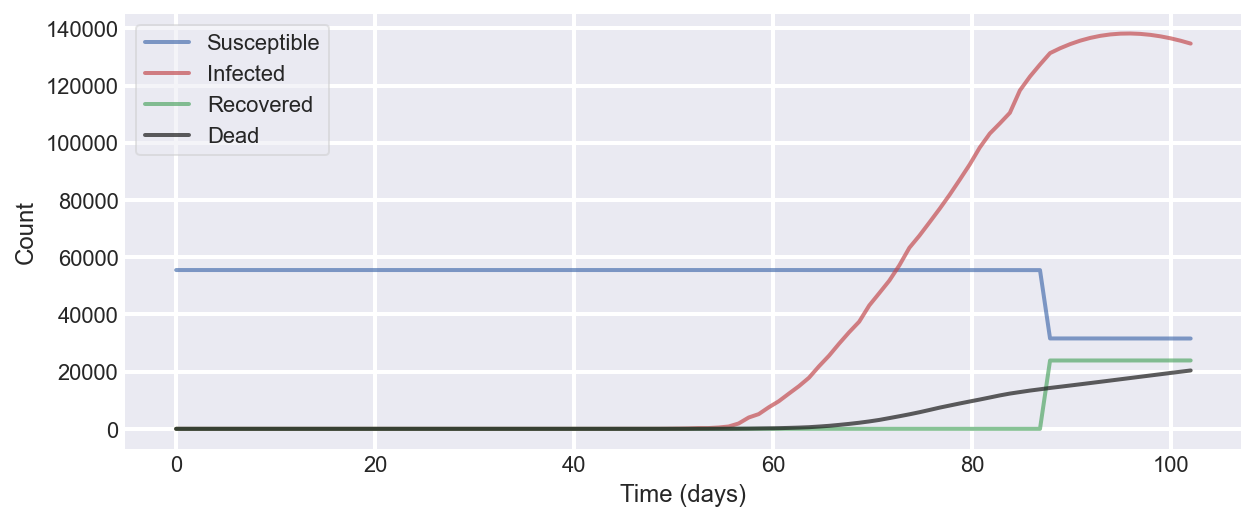

In [304]:
# plot for New York, NY
t = np.linspace(0, len(train + test), 102)
plotSIRDS(t, S.iloc[0, 5:199].tolist(), I.iloc[0, 5:199].tolist(), R.iloc[0, 5:199].tolist(), DS.iloc[0, 5:199].tolist())

Which counties will have the most infections or deaths according to this model?

In [311]:
# run model on all current dates and predict 2 weeks ahead
S,I,R,DS = sir_model(14, train + test, confirmed_data, deaths_data, mortality, recovered)

In [331]:
# infections
I = I.sort_values('5/16/20', ascending=False)
I[['CountyName', 'State', '5/16/20']].iloc[:10]

,CountyName,State,5/16/20
1849,New York,New York,145920.0
601,Cook,Illinois,100223.0
1848,Nassau,New York,86221.0
1870,Suffolk,New York,82220.0
1878,Westchester,New York,71222.0
198,Los Angeles,California,62439.0
1303,Wayne,Michigan,41061.0
1766,Bergen,New Jersey,38644.0
2285,Philadelphia,Pennsylvania,37637.0
1773,Hudson,New Jersey,36827.0


In [332]:
# deaths
DS = DS.sort_values('5/16/20', ascending=False)
DS[['CountyName', 'State', '5/16/20']].iloc[:10]

,CountyName,State,5/16/20
1849,New York,New York,25775.0
1848,Nassau,New York,4276.0
601,Cook,Illinois,4241.0
1303,Wayne,Michigan,3936.0
1870,Suffolk,New York,3628.0
198,Los Angeles,California,3100.0
1216,Middlesex,Massachusetts,2635.0
1766,Bergen,New Jersey,2321.0
1771,Essex,New Jersey,2263.0
301,Fairfield,Connecticut,2246.0


What if we remove NY counties since we know they are the most affected?

In [333]:
# infections
I[I['StateName'] != 'NY'][['CountyName', 'State', '5/16/20']].iloc[:10]

,CountyName,State,5/16/20
601,Cook,Illinois,100223.0
198,Los Angeles,California,62439.0
1303,Wayne,Michigan,41061.0
1766,Bergen,New Jersey,38644.0
2285,Philadelphia,Pennsylvania,37637.0
1773,Hudson,New Jersey,36827.0
1216,Middlesex,Massachusetts,36469.0
1771,Essex,New Jersey,34391.0
1220,Suffolk,Massachusetts,32379.0
1780,Passaic,New Jersey,31022.0


In [334]:
# deaths
DS[DS['StateName'] != 'NY'][['CountyName', 'State', '5/16/20']].iloc[:10]

,CountyName,State,5/16/20
601,Cook,Illinois,4241.0
1303,Wayne,Michigan,3936.0
198,Los Angeles,California,3100.0
1216,Middlesex,Massachusetts,2635.0
1766,Bergen,New Jersey,2321.0
1771,Essex,New Jersey,2263.0
301,Fairfield,Connecticut,2246.0
1220,Suffolk,Massachusetts,2104.0
3133,Miami-Dade,Florida,1884.0
305,New Haven,Connecticut,1859.0
